In [ ]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Access a public Github repos
# !rm -rf /content/COVID19_Pneumonia_Normal_Chest_Xray_PA # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA.git

/content
Cloning into 'COVID19_Pneumonia_Normal_Chest_Xray_PA'...
remote: Enumerating objects: 6884, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 6884 (delta 28), reused 40 (delta 10), pack-reused 6811
Receiving objects: 100% (6884/6884), 1.86 GiB | 16.41 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (7001/7001), done.


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [ ]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [ ]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["COVID19_Pneumonia_Normal_Chest_Xray_PA"]

for folder in repository_folder:
    local_path = '/content/' + folder + '/dataset'
    DataSetSummary(local_path, 0)
    local_path = '/content/' + folder + '/sample'
    DataSetSummary(local_path, 0)

Tổng số thư mục: 3
-Thư mục: covid, Số tệp: 2313
-Thư mục: normal, Số tệp: 2313
-Thư mục: pneumonia, Số tệp: 2313
Tổng số thư mục: 3
-Thư mục: covid, Số tệp: 20
-Thư mục: normal, Số tệp: 20
-Thư mục: pneumonia, Số tệp: 20


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/01_00_01

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Thesis/01_00_01'
/content


In [ ]:
# Set the path to your dataset
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'
dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset'


In [ ]:
import os

class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path):
    images = []
    # labels = [] # direct
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                img = Image(image_path, class_name)
                images.append(img)
                # labels.append(img.label) # direct
    # return images, labels # direct
    return images

images = load_images_from_folder(dataset_path)
# for class_name, imgs in images.items():
#     for img in imgs:
#         print(f"Path: {img.path}, Label: {img.label}")

Class covid


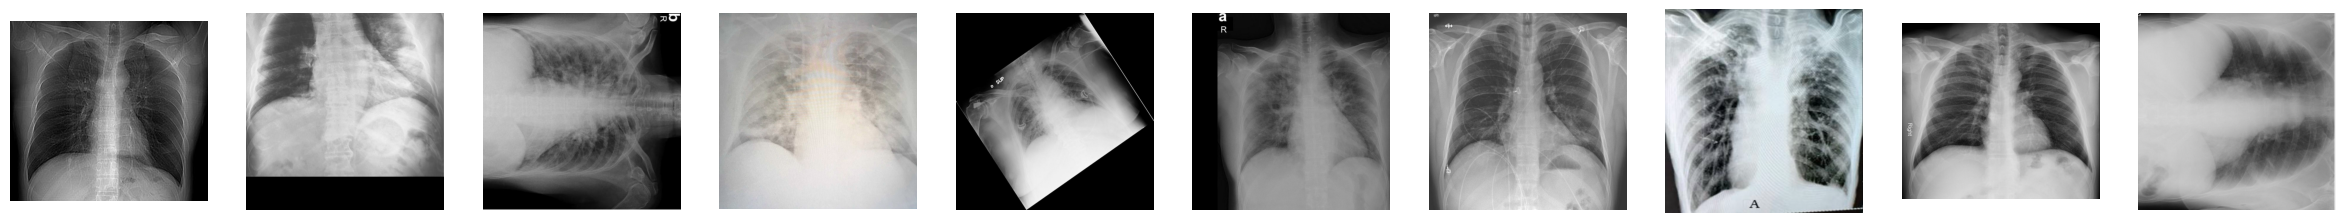

Class normal


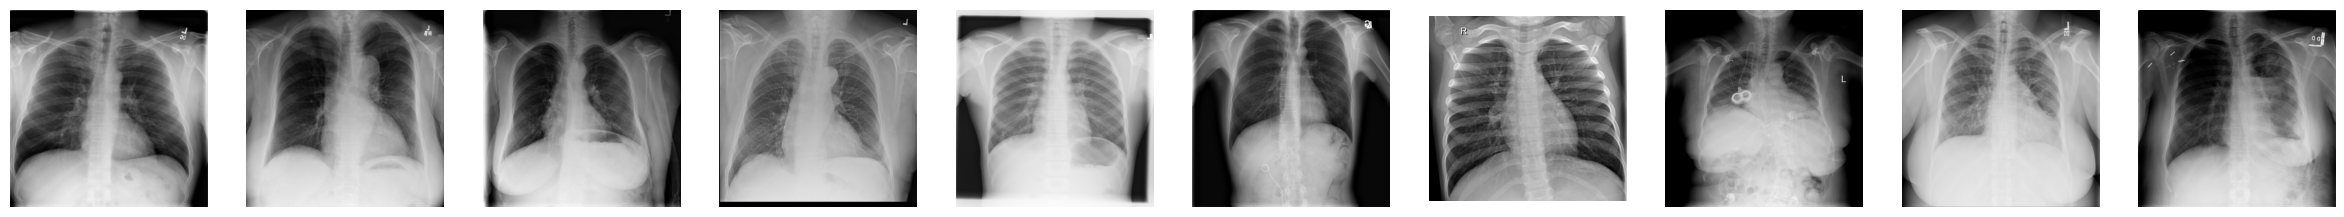

Class pneumonia


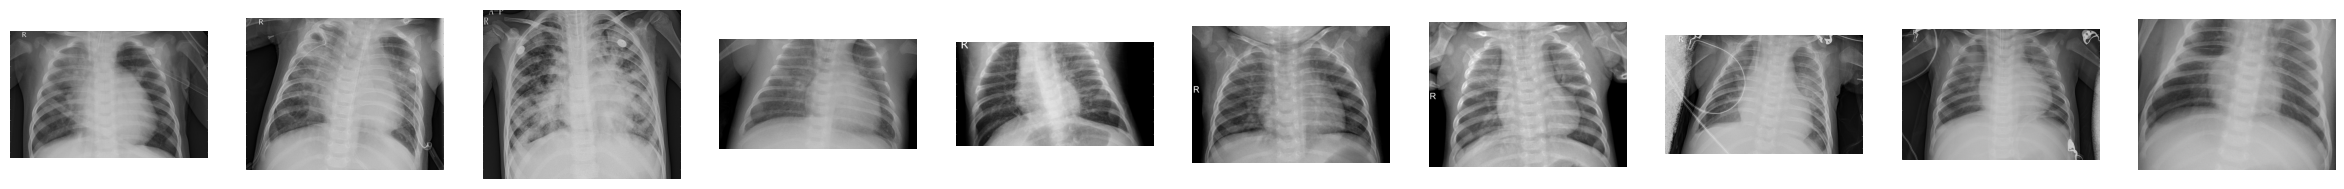

In [ ]:
def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder(dataset_path)
imshow(images, 10)


In [ ]:
images['normal'][0].path

'/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset/normal/00000833_002.png'

In [ ]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
# image_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/pneumonia/00001182_004.png"
image_path = images['normal'][0].path
image_specifications = get_image_specifications(image_path)
print(image_specifications)

Image Format: PNG
Image Mode: L
Image Size: (1024, 1024) pixels (Width: 1024, Height: 1024)
Image Colors: [(21733, 0), (8838, 1), (5229, 2), (5437, 3), (5668, 4), (5025, 5), (5214, 6), (2406, 7), (1335, 8), (1210, 9), (1156, 10), (1071, 11), (1292, 12), (1364, 13), (1127, 14), (1125, 15), (1198, 16), (1255, 17), (1274, 18), (1195, 19), (1221, 20), (1171, 21), (1218, 22), (1192, 23), (1230, 24), (1363, 25), (1454, 26), (1467, 27), (1561, 28), (1682, 29), (1831, 30), (1874, 31), (2067, 32), (2262, 33), (2443, 34), (2628, 35), (2660, 36), (2832, 37), (2885, 38), (3270, 39), (3431, 40), (3652, 41), (3715, 42), (3946, 43), (4378, 44), (4498, 45), (4570, 46), (4828, 47), (5121, 48), (5205, 49), (5410, 50), (5662, 51), (5581, 52), (5811, 53), (5634, 54), (5577, 55), (5678, 56), (5550, 57), (5467, 58), (5557, 59), (5486, 60), (5394, 61), (5518, 62), (5325, 63), (5395, 64), (5610, 65), (5789, 66), (5840, 67), (5871, 68), (5627, 69), (5666, 70), (5578, 71), (5485, 72), (5437, 73), (5388, 74), (5

## Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

Reformatting 256.jfif to JPG format...
Reformatted 256.jfif to JPG format.
Reformatting 250.jfif to JPG format...
Reformatted 250.jfif to JPG format.
Reformatting 165.jfif to JPG format...
Reformatted 165.jfif to JPG format.
Reformatting 368.jfif to JPG format...
Reformatted 368.jfif to JPG format.
Reformatting 370.jfif to JPG format...
Reformatted 370.jfif to JPG format.
Reformatting 248.jfif to JPG format...
Reformatted 248.jfif to JPG format.
Reformatting 259.jfif to JPG format...
Reformatted 259.jfif to JPG format.
Reformatting 246.jfif to JPG format...
Reformatted 246.jfif to JPG format.
Reformatting 249.jfif to JPG format...
Reformatted 249.jfif to JPG format.
Reformatting 405.jfif to JPG format...
Reformatted 405.jfif to JPG format.
Reformatting 407.jfif to JPG format...
Reformatted 407.jfif to JPG format.
Reformatting 365.jfif to JPG format...
Reformatted 365.jfif to JPG format.
Reformatting 257.jfif to JPG format...
Reformatted 257.jfif to JPG format.
Reformatting 408.jfif to 

Nguồn :Despeckling Images using a Preprocessing Filter and Discrete Wavelet Transform-Based Noise Reduction Techniques
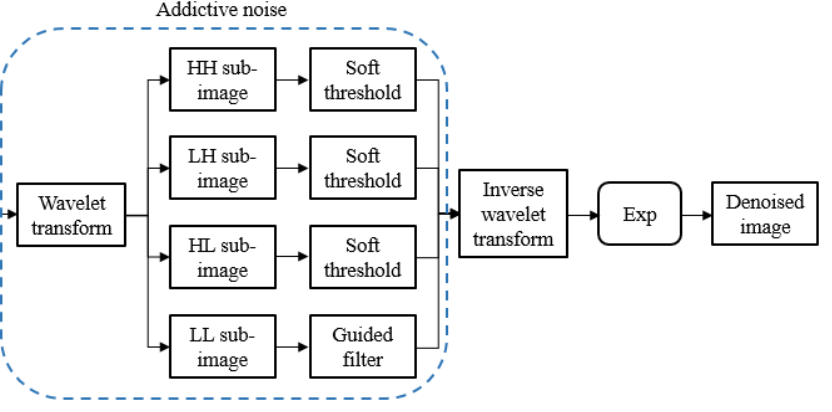

In [ ]:
import os
import cv2
import numpy as np
import pywt
from shutil import copyfile

# Đường dẫn của dataset, có thể cần điều chỉnh
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'

# Đường dẫn lưu trữ ảnh đã được xử lý
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Massive_Wavelet_Denoising'

# Tạo thư mục output nếu nó chưa tồn tại
os.makedirs(output_path, exist_ok=True)

# Lấy danh sách thư mục con trong dataset
child_folders = os.listdir(dataset_path)




def wavelet_denoise(image):
    # Áp dụng biến đổi sóng 2D
    coeffs = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs

    # Giảm nhiễu ở mức HH, LH, HL
    denoised_HH = pywt.threshold(HH, 0.5, mode='soft')
    denoised_LH = pywt.threshold(LH, 0.5, mode='soft')
    denoised_HL = pywt.threshold(HL, 0.5, mode='soft')
    thresh = np.std(LL)
    LL = pywt.threshold(LL, thresh)


    # Tạo lại ảnh từ các hệ số đã được xử lý
    coeffs = (LL, (denoised_LH, denoised_HL, denoised_HH))
    denoised_image = pywt.idwt2(coeffs, 'bior1.3')

    return denoised_image
# Hàm thực hiện biến đổi sóng và lọc nhiễu
# def wavelet_denoise(image):
#     # Áp dụng biến đổi sóng 2D
#     coeffs = pywt.dwt2(image, 'bior1.3')
#     LL, (LH, HL, HH) = coeffs

#     # Giảm nhiễu ở mức HH, LH, HL
#     denoised_HH = pywt.threshold(HH, 0.1, mode='soft')
#     denoised_LH = pywt.threshold(LH, 0.1, mode='soft')
#     denoised_HL = pywt.threshold(HL, 0.1, mode='soft')

#     # Tạo lại ảnh từ các hệ số đã được xử lý
#     coeffs = (LL, (denoised_LH, denoised_HL, denoised_HH))
#     denoised_image = pywt.idwt2(coeffs, 'bior1.3')

#     return denoised_image


# import cv2
# import numpy as np
# import pywt

# def wavelet_denoise(image):
#     # Áp dụng biến đổi sóng 2D
#     coeffs = pywt.dwt2(image, 'bior1.3')
#     LL, (LH, HL, HH) = coeffs

#     # Tạo guided filter cho tất cả các mức
#     guide = LH + HL + HH
#     guide = guide.astype(np.float32)  # Ensure guide has CV_32F depth

#     # Áp dụng guided filter cho tất cả các mức
#     filtered_LH = cv2.ximgproc.guidedFilter(LH.astype(np.float32), guide, 10, 1e-4, 5)
#     filtered_HL = cv2.ximgproc.guidedFilter(HL.astype(np.float32), guide, 10, 1e-4, 5)
#     filtered_HH = cv2.ximgproc.guidedFilter(HH.astype(np.float32), guide, 10, 1e-4, 5)

#     # Áp dụng guided filter cho mức LL
#     filtered_LL = cv2.ximgproc.guidedFilter(LL.astype(np.float32), guide, 10, 1e-4, 5)

#     # Tạo lại ảnh từ các hệ số đã được xử lý
#     coeffs = (filtered_LL.astype(np.uint8), (filtered_LH, filtered_HL, filtered_HH))
#     denoised_image = pywt.idwt2(coeffs, 'bior1.3')

#     return denoised_image




# def wavelet_denoise(image):
#     # Áp dụng biến đổi sóng 2D
#     coeffs = pywt.dwt2(image, 'bior1.3')
#     LL, (LH, HL, HH) = coeffs

#     # Giảm nhiễu ở mức HH, LH, HL
#     denoised_HH = pywt.threshold(HH, 0.1, mode='soft')
#     denoised_LH = pywt.threshold(LH, 0.1, mode='soft')
#     denoised_HL = pywt.threshold(HL, 0.1, mode='soft')

#     # Giảm nhiễu ở mức LL
#     guide = denoised_HH + denoised_LH + denoised_HL
#     guide = guide.astype(np.float32)  # Ensure guide has CV_32F depth

#     # Use guided filter to further denoise LL
#     filtered = cv2.ximgproc.guidedFilter(LL.astype(np.float32), guide, 10, 1e-4, 5)

#     # Tạo lại ảnh từ các hệ số đã được xử lý
#     coeffs = (filtered.astype(np.uint8), (denoised_LH, denoised_HL, denoised_HH))
#     denoised_image = pywt.idwt2(coeffs, 'bior1.3')

#     return denoised_image




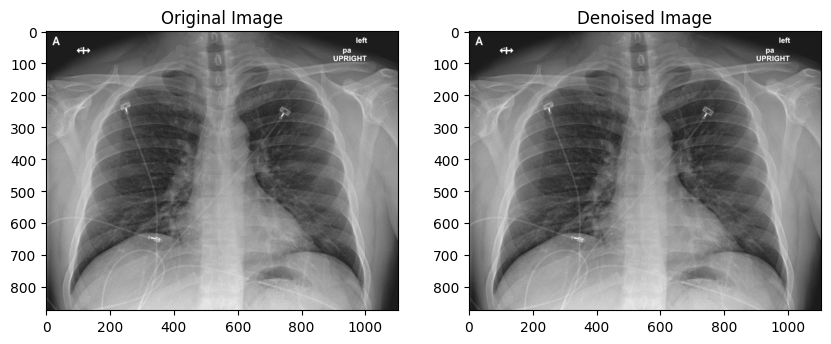

In [ ]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset/covid/012.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = wavelet_denoise(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()


In [ ]:
# Counter for denoised images
denoised_count = 0

# Xử lý từng thư mục con
for folder in child_folders:

    # Tạo thư mục output cho thư mục con hiện tại
    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Lấy danh sách các tệp ảnh trong thư mục con hiện tại
    folder_path = os.path.join(dataset_path, folder)
    image_files = os.listdir(folder_path)

    # Xử lý từng tệp ảnh
    for image_file in image_files:
        # Đọc ảnh
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Áp dụng biến đổi sóng và lọc nhiễu
        denoised_image = wavelet_denoise(img)

        # Xuất ảnh đã xử lý ra thư mục output
        filename, extension = os.path.splitext(image_file)
        output_image_path = os.path.join(output_folder, filename + '.jpg')
        cv2.imwrite(output_image_path, denoised_image)
        # Increment the counter
        denoised_count += 1
    # Hiển thị số lượng ảnh đã được denoise
    print(f"Total images denoised: {denoised_count}")

Total images denoised: 2350
Total images denoised: 4663
Total images denoised: 6976


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Massive_Wavelet_Denoising'